### `K-Nearest Neighbor`

A simple but powerful approach for making predictions is to use the most similar historical examples to the new data. This is the principle behind the k-Nearest Neighbors algorithm. Similarity between records can be measured many different ways. A problem or data-specific method can be used. Generally, with tabular data, a good starting point is the Euclidean distance.

This k-Nearest Neighbors tutorial is broken down into 3 parts:

- **Step 1**: Calculate Euclidean Distance.
- **Step 2**: Get Nearest Neighbors.
- **Step 3**: Make Predictions.

These steps will teach you the fundamentals of implementing and applying the k-Nearest Neighbors algorithm for classification and regression predictive modeling problems.

#### **Calculate Distance**

The first step is to calculate the distance between two rows in a dataset.

Rows of data are mostly made up of numbers and an easy way to calculate the distance between two rows or vectors of numbers is to draw a straight line. 

We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.

$$ d = \sqrt{\sum_{j=1}^p (x1_j-x2_j)^2}$$

Where: 
- x1 is the first row of data, 
- x2 is the second row of data and 
- j is the index to a specific column as we sum across all columns.

With Euclidean distance, the smaller the value, the more similar two records will be. A value of 0 means that there is no difference between two records

In [7]:
import numpy as np
test = [12,15,16]
train = [12,16,17]

def euclidean_distance(train,test):
    distance_square = 0
    for i in range(len(test)):
        distance_square += (test[i]-train[i])**2
    distance = np.sqrt(distance_square)
    return distance

In [8]:

euclidean_distance(train,test)

1.4142135623730951

#### **Get Nearest Neighbor**

To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above. Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.


In [9]:
train = [
    [12,16,17,1],
    [20,13,18,1],
    [9,14,18,0],
    [17,15,20,1],
]

test = [12,15,16]

def get_neighbors(train,test,num_neighbors):
    distances = []
    for train_row in train:
        dist = euclidean_distance(train_row, test)
        distances.append((train_row,dist))
        distances.sort(key=lambda x: x[1])

    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    
    return neighbors

In [10]:
get_neighbors(train,test,3)

[[12, 16, 17, 1], [9, 14, 18, 0], [17, 15, 20, 1]]

#### **Make Prediction**

The most similar neighbors collected from the training dataset can be used to make predictions. In the case of classification, we can return the most represented class among the neighbors.


In [11]:
def predict_classification(train,test,num_neighbors):
    neighbors = get_neighbors(train,test,num_neighbors)
    output_value = [row[-1] for row in neighbors]
    # print(output_value)
    prediction = max(set(output_value), key=output_value.count)
    return prediction

In [12]:
predict_classification(train,[10,13,17],3)

1

#### **Scikit-learn Implementation**

**Importing Libraries**

In [13]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm

### `Business Problem Understanding`

**Problem Statement**
Klasifikasi kualitas wine merupakan tugas yang sulit karena rasa adalah hal yang paling sedikit dipahami oleh indera manusia. Prediksi kualitas wine yang baik bisa sangat berguna dalam tahap sertifikasi, karena saat ini analisis sensorik dilakukan oleh manusia dengan cara pencicipan dimana hal ini merupakan pendekatan yang subjektif.

**Goals**
Menentukan kualitas dri wine berdasarkan fitur alcohol dan density.

**Analytic Approach**
Jadi yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu wine dengan wine yang lain.

Selanjutnya, kita akan membangun suatu model klasifikasi yang akan membantu perusahaan untuk dapat menyediakan tool prediksi kualitas dari wine baru, yang mana akan berguna untuk menentukan harga dari suatu wine.

**Metric Evaluation**
Evaluasi metrik yang akan digunakan adalah accuracy. Semakin tinggi nilainya, berarti model semakin akurat dalam melabeli kualitas wine sesuai dengan limitasi fitur yang digunakan.

### `Data Understanding`

In [14]:
data = pd.read_csv('white_wine.csv')[['alcohol','density','quality']]

print(f'jumlah baris dan kolom :{data.shape}')
data.head()

jumlah baris dan kolom :(520, 3)


,alcohol,density,quality
0,8.8,1.0010,6.0
1,9.5,0.9940,6.0
2,10.1,0.9951,6.0
3,9.9,0.9956,6.0
4,9.9,0.9956,6.0


In [15]:
pd.DataFrame({
    'feature': data.columns.values,
    'data_type': data.dtypes.values,
    'null': data.isna().mean().values * 100,
    'negative': [True if data[col].dtype == int and (data[col] < 0).any() else False for col in data.columns],
    'n_unique': data.nunique().values,
    'min': data.min().values,
    'max': data.max().values,
    'sample_unique': [data[col].unique() for col in data.columns]
})

,feature,data_type,null,negative,n_unique,min,max,sample_unique
0,alcohol,float64,0.192308,False,45,8.5000,12.9000,"[8.8, 9.5, 10.1, 9.9, 9.6, 11.0, 12.0, 9.7, 10..."
1,density,float64,0.000000,False,100,0.9899,1.0033,"[1.001, 0.994, 0.9951, 0.9956, 0.9949, 0.9938,..."
2,quality,float64,0.192308,False,6,3.0000,8.0000,"[6.0, 5.0, 7.0, 8.0, 4.0, 3.0, nan]"


**Insight**

- Dataset terdiri dari 520 baris dan 12 kolom.
- Semua variabel tergolong numerikal dan continous, kecuali quality yaitu diskrit
- Format data dari variabel quality seharusnya integer
- Skala dari variabel total sulfur dioxide dan free sulfur dioxide lebih besar dibanding yang lain.

### `Data Preparation`

`Duplicates`

**Duplicated Value**, Deteksi dan kuantifikasi duplikasi data

In [16]:
print(f'jumlah data duplikat adalah {data.duplicated().sum()} baris')
print(f'persentase data duplikat {data.duplicated().sum()/len(data)*100:.2f}%')

jumlah data duplikat adalah 115 baris
persentase data duplikat 22.12%


Sebesar 22% data terindikasi duplikat, maka hilangkan salah satunya.

Handling duplikasi data:

In [17]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
data.shape

(405, 3)

In [19]:
data.duplicated().sum()

0

`Missing Values`

Deteksi dan kuantifikasi missing value

In [20]:
data.isna().sum()

alcohol    1
density    0
quality    1
dtype: int64

Dua variabel (alcohol, quality) berisi 1 point data atau 0.2% missing value.

Handling missing value:

In [21]:
data.dropna(inplace=True)

In [22]:
data.isna().sum()

alcohol    0
density    0
quality    0
dtype: int64

`Rare Labels`

Deteksi dan kuantifikasi rare value:

In [23]:
data['quality'].value_counts(normalize=True)*100

quality
6.0    45.049505
5.0    31.435644
7.0    15.099010
4.0     4.207921
8.0     3.217822
3.0     0.990099
Name: proportion, dtype: float64

Lebih dari 50% didominasi oleh anggur dengan kualitas lebih dari 6.

Handling rare value:

In [24]:
data['quality'] = np.where(data['quality']>6,1,0)

In [25]:
data['quality'].value_counts()

quality
0    330
1     74
Name: count, dtype: int64

`Outliers`

Deteksi dan kuantifikasi outlier:

Text(0.5, 1.2, 'Data Distribution')

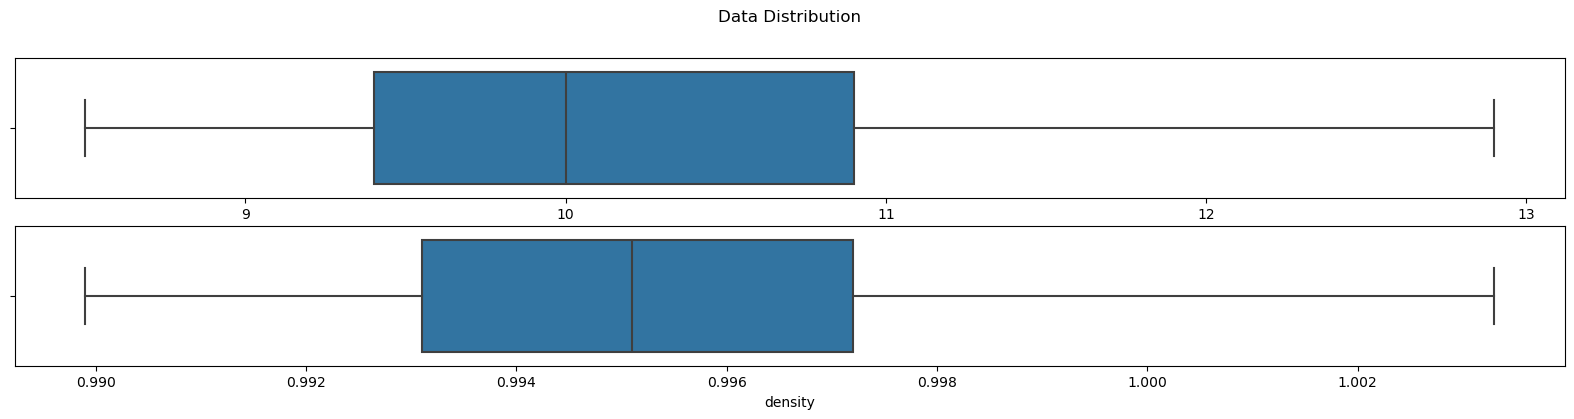

In [26]:
fig, ax = plt.subplots(2,1,figsize=(20,4))
sns.boxplot(data=data,x='alcohol',ax=ax[0])
sns.boxplot(data=data,x='density',ax=ax[1])
ax[0].set_title('Data Distribution',y=1.2)

Tidak terdapat outlier pada variabel density.

`Imbalance Data`

Deteksi dan kuantifikasi proporsi label target

In [27]:
data['quality'].value_counts(normalize=True)

quality
0    0.816832
1    0.183168
Name: proportion, dtype: float64

Persentase jumlah label 0 (81.6%) lebih banyak dibandingkan label 1 (18.2%), ini termasuk imbalance.

`Check Multicollinearity`

Deteksi multicollinearity antar fitur dengan VIF.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = data.drop(columns='quality')
y = data['quality']

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Feature"] =  X.columns

vif.round(2)

,VIF Factor,Feature
0,88.56,alcohol
1,88.56,density


Terdapat multicollinearity antara fitur alcohol dan density. Saat menggunakan model linear, multicollinearity seharusnya dihindari. Namun untuk studi kasus ini kita akan pertahankan dahulu.

**Feature Engineering**

Bagi dataset menjadi train dan test set.

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=0,stratify=y)
X_train.shape, X_test.shape


((323, 2), (81, 2))

### `Model Experiment`

Setting parameter dasar untuk menginisialisasi experiment dan membuat pipeline transformasi

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler #scaling

#define Transformer
transformer = ColumnTransformer([
    ('scaler', RobustScaler(), ['alcohol', 'density'])
], remainder='passthrough')

#fit
X_train_scale = transformer.fit_transform(X_train)
X_test_scale = transformer.transform(X_test)

In [31]:
X_train_scale

array([[ 0.25806452, -0.53012048],
       [-0.58064516,  0.93975904],
       [ 0.64516129, -0.28915663],
       [ 0.38709677, -0.53012048],
       [ 1.87096774, -0.07228916],
       [-0.64516129,  0.57831325],
       [ 1.67741935,  0.04819277],
       [-0.70967742,  0.26506024],
       [ 0.32258065, -0.74698795],
       [ 1.5483871 ,  0.26506024],
       [ 0.32258065, -0.12048193],
       [ 0.51612903, -0.74698795],
       [ 0.38709677, -0.77108434],
       [-0.83870968,  0.57831325],
       [ 0.32258065, -0.31325301],
       [-0.64516129,  0.6746988 ],
       [-0.25806452, -0.21686747],
       [-0.64516129,  0.12048193],
       [-0.38709677,  0.45783133],
       [ 0.90322581, -0.5060241 ],
       [-0.77419355,  0.6746988 ],
       [-0.32258065,  0.93975904],
       [-0.12903226,  0.07228916],
       [ 1.03225806, -0.89156627],
       [ 0.90322581, -1.13253012],
       [ 0.64516129,  0.26506024],
       [ 0.77419355,  0.40963855],
       [-0.70967742, -0.24096386],
       [-0.77419355,

**Benchmark Model**

`Without Scaling`

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#define model
estimator = KNeighborsClassifier(metric='euclidean')

# fitting
estimator.fit(X_train, y_train)

#predict
y_pred_test = estimator.predict(X_test)

#evaluate
print(f'Model accuracy in the test set: {accuracy_score(y_test, y_pred_test):.3f}')


Model accuracy in the test set: 0.938


`With Scaling`

In [33]:
#define model
estimator = KNeighborsClassifier(metric='euclidean')

# fitting
estimator.fit(X_train_scale, y_train)

#predict
y_pred_test = estimator.predict(X_test_scale)

#evaluate
print(f'Model accuracy in the test set: {accuracy_score(y_test, y_pred_test):.3f}')


Model accuracy in the test set: 0.975


- KNN membutuhkan scaling

**Model Selection**

In [34]:
testing_accuracies = []
training_accuracies = []

k = range(1, 50, 2)

for i in k:
    # fitting
    estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=i)
    estimator.fit(X_train_scale, y_train)

    # predict
    y_pred_test = estimator.predict(X_test_scale)
    y_pred_train = estimator.predict(X_train_scale)

    # accuracy_score
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)

    # append
    training_accuracies.append(accuracy_train)
    testing_accuracies.append(accuracy_test)

pd.DataFrame({
    'K Nearest' : [i for i in k],
    'Training Accuracy' : training_accuracies,
    'Testing Accuracy' : testing_accuracies,
}).sort_values(['Testing Accuracy', 'Training Accuracy'],ascending=False)


,K Nearest,Training Accuracy,Testing Accuracy
6,13,0.962848,0.987654
7,15,0.962848,0.987654
8,17,0.959752,0.987654
9,19,0.956656,0.987654
10,21,0.956656,0.987654
11,23,0.956656,0.987654
12,25,0.950464,0.987654
13,27,0.947368,0.987654
14,29,0.944272,0.987654
15,31,0.944272,0.987654


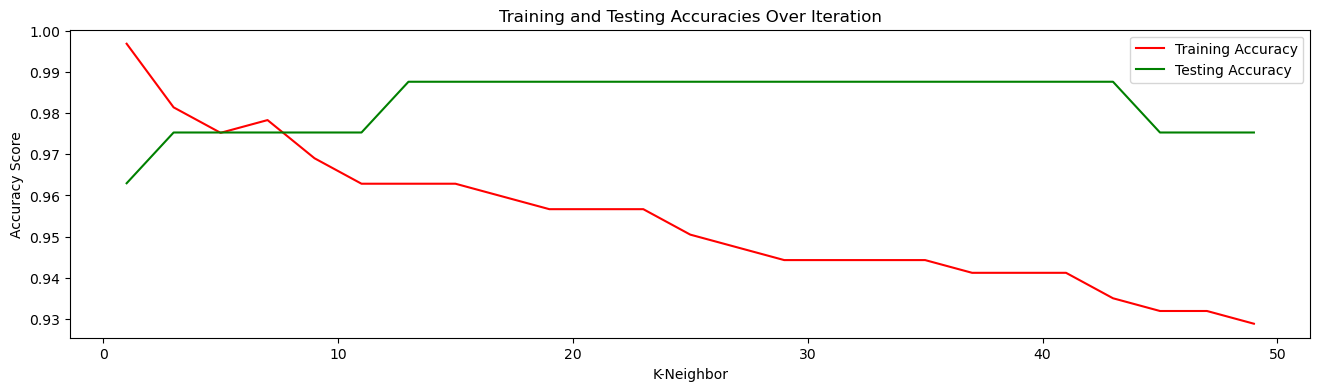

In [35]:
plt.figure(figsize=(16,4))
plt.plot(k,training_accuracies,label='Training Accuracy', c = 'red')
plt.plot(k,testing_accuracies,label='Testing Accuracy', c = 'green')
plt.title('Training and Testing Accuracies Over Iteration')
plt.xlabel('K-Neighbor')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

**Insight**

- Nilai K yang lebih besar dapat menghasilkan model yang lebih stabil dan lebih sedikit variabel karena model ini mengumpulkan informasi dari lebih banyak tetangga. Hal ini membuat model tidak terlalu rentan terhadap noise pada data.

- Nilai K yang lebih besar dapat meningkatkan bias model atau menyebabkan kesalahan klasifikasi. Ini disebabkan karena menggeneralisasi terlalu banyak atau kehilangan kemampuannya untuk menangkap pola-pola halus dalam data. Model ini mungkin kesulitan membedakan antara kelas-kelas di wilayah dengan titik data yang beragam.

- Ketika K meningkat, kompleksitas dan waktu komputasi untuk membuat prediksi juga meningkat, karena algoritma harus mencari dan mempertimbangkan lebih banyak neighbors.

**Model Interpretation**

In [36]:
from mlxtend.plotting import plot_decision_regions

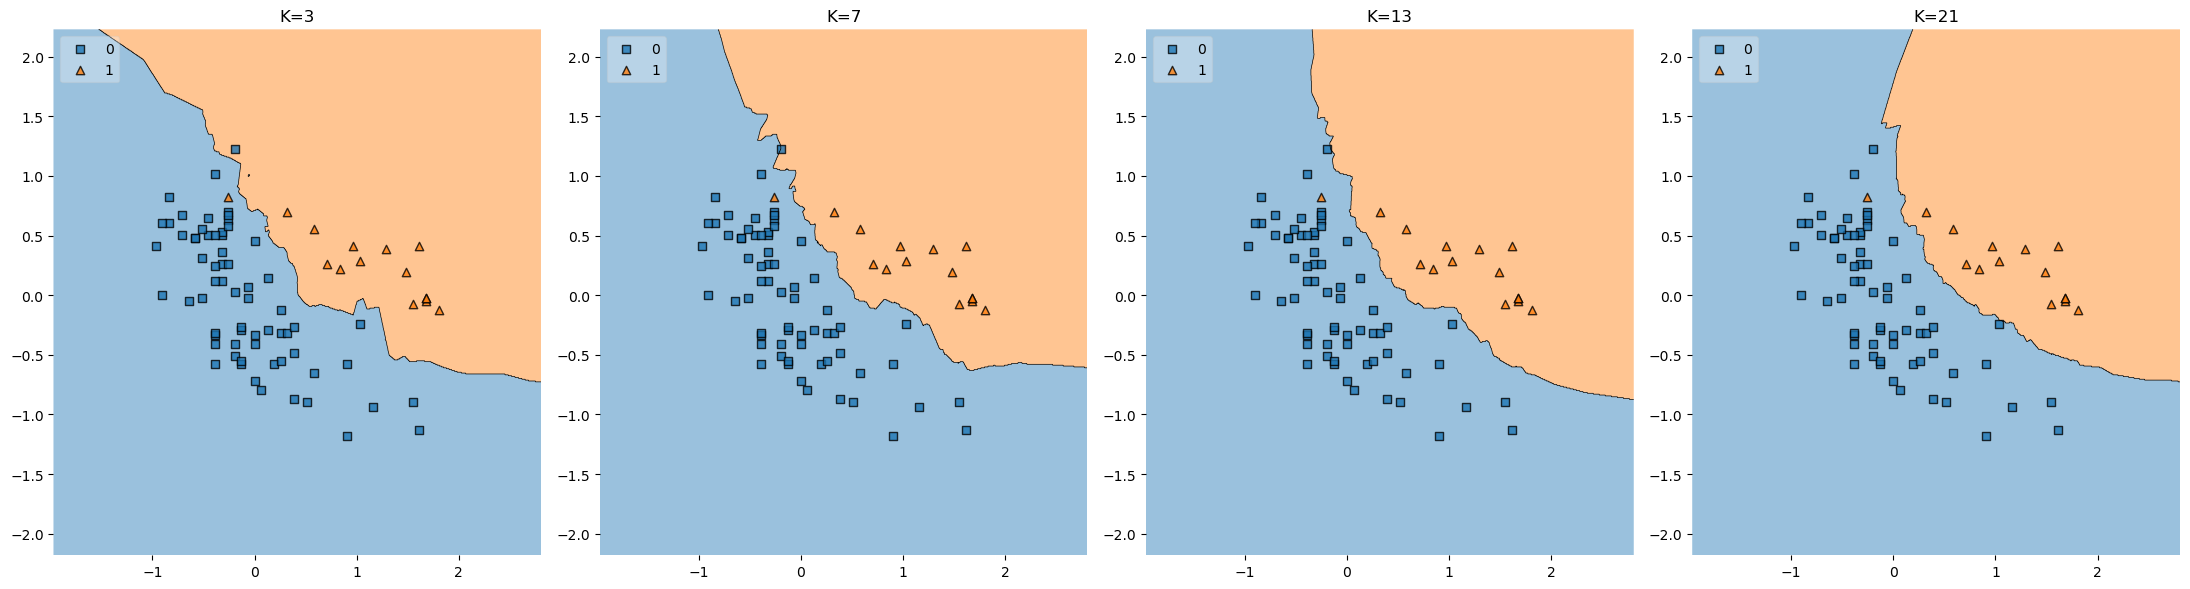

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(22, 6))

k_values = [3, 7, 13, 21]

for id, k in enumerate(k_values):
    estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=k)
    estimator.fit(X_train_scale, y_train)
    ax[id].set_title(f'K={k}')
    plot_decision_regions(X_test_scale, y_test.to_numpy(), clf=estimator, legend=2, ax=ax[id])

plt.tight_layout()
plt.show()

**Insight**: Nilai K yang besar menyebabkan decision boundary cenderung lebih halus dan kurang sensitif terhadap variasi kecil dalam data.

**Final Model**

In [42]:
# Mendefinisikan model
best_estimator = KNeighborsClassifier(metric='euclidean', n_neighbors=11)
best_estimator.fit(X_train_scale, y_train)

# Memprediksi
y_pred_train = best_estimator.predict(X_train_scale)
y_pred_test = best_estimator.predict(X_test_scale)

# Evaluasi
print(f'Model Accuracy in Training set: {accuracy_score(y_train, y_pred_train):.3f}')
print(f'Model Accuracy in Test set: {accuracy_score(y_test, y_pred_test):.3f}')

Model Accuracy in Training set: 0.963
Model Accuracy in Test set: 0.975


- Akurasi pada test set : 98.36%
- Model KNN mampu memprediksi 98.36% kualitas anggur dengan benar (baik yang berkualitas Good maupun Bad)
- Dari 122 botol anggur, 120 botol dilabeli dengan benar.

**Predict to New Data**

In [43]:
new_data = pd.DataFrame({
    'alcohol' : [9, 10, 11],
    'density': [0.990, 0.995, 1],
})

new_data

,alcohol,density
0,9,0.990
1,10,0.995
2,11,1.000


In [45]:
best_estimator.predict(transformer.transform(new_data))

array([0, 0, 1])

In [46]:
transformer.transform(new_data)

array([[-0.64516129, -1.22891566],
       [ 0.        , -0.02409639],
       [ 0.64516129,  1.18072289]])

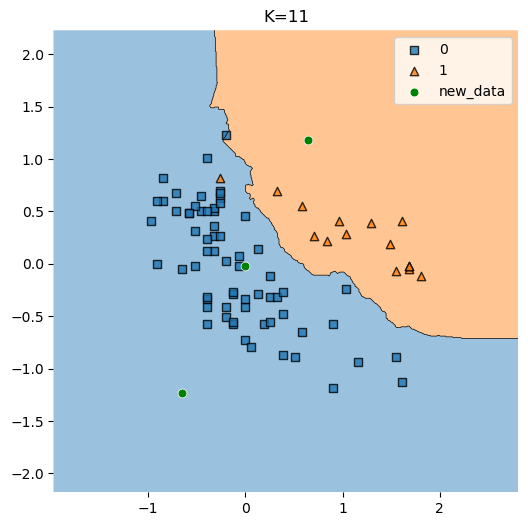

In [48]:
fig, ax = plt.subplots(figsize=(6,6))

estimator = KNeighborsClassifier(metric='euclidean',n_neighbors=11)
estimator.fit(X_train_scale,y_train)

ax.set_title('K=11')
plot_decision_regions(X_test_scale, y_test.to_numpy(),clf=estimator,legend=2)

sns.scatterplot(x=transformer.transform(new_data)[:,0] ,y=transformer.transform(new_data)[:,1], color='green',s=40, label='new_data')

plt.show()